In [45]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# GeoTiff Images
import rasterio
from osgeo import gdal

# Visualisation
from matplotlib import pyplot as plt
import matplotlib.image as img
from matplotlib.pyplot import figure
from PIL import Image
%matplotlib inline

# Model Building
import ultralytics
from ultralytics import YOLO
import labelme2yolo

# Others
import os
import shutil
import zipfile

In [19]:
!labelme2yolo --json_dir ./training_data_1/

INFO:labelme2yolo:Converting train set ...
100%|███████████████████████████████████████████| 37/37 [00:04<00:00,  8.83it/s]
INFO:labelme2yolo:Converting val set ...
100%|█████████████████████████████████████████████| 9/9 [00:01<00:00,  8.94it/s]
INFO:labelme2yolo:Converting test set ...
0it [00:00, ?it/s]


In [27]:
!mkdir /home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_1/training_data_1/YOLODataset/datasets/train

In [28]:
!mkdir /home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_1/training_data_1/YOLODataset/datasets/val

In [31]:
!cp /home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_1/training_data_1/YOLODataset/images/train/*png /home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_1/training_data_1/YOLODataset/datasets/train/

In [34]:
!cp /home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_1/training_data_1/YOLODataset/images/val/*png /home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_1/training_data_1/YOLODataset/datasets/val/

In [35]:
!cp /home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_1/training_data_1/YOLODataset/labels/train/*txt /home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_1/training_data_1/YOLODataset/datasets/train/

In [36]:
!cp /home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_1/training_data_1/YOLODataset/labels/val/*txt /home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_1/training_data_1/YOLODataset/datasets/val/

In [37]:
#Loading the model
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 259MB/s]


In [38]:
# Display model information (optional)
model.info()

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [41]:
# Train the model on the dataset for 50 epochs
results = model.train(data='/home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_1/training_data_1/YOLODataset/dataset.yaml', epochs=50, imgsz=512)

Ultralytics YOLOv8.1.17 🚀 Python-3.11.4 torch-2.2.0+cu121 CPU (Intel Xeon Platinum 8272CL 2.60GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_1/training_data_1/YOLODataset/dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fra

100%|██████████| 755k/755k [00:00<00:00, 130MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'


train: Scanning /home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_1/training_data_1/YOLODataset/datasets/train... 37 images, 0 backgrounds, 0 corrupt: 100%|██████████| 37/37 [00:00<00:00, 578.13it/s]

train: New cache created: /home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_1/training_data_1/YOLODataset/datasets/train.cache



val: Scanning /home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_1/training_data_1/YOLODataset/datasets/val... 9 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9/9 [00:00<00:00, 628.94it/s]

val: New cache created: /home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_1/training_data_1/YOLODataset/datasets/val.cache


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 0 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.977        3.8      1.831        214        512: 100%|██████████| 3/3 [00:08<00:00,  2.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all          9        213    0.00869      0.348    0.00789    0.00314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.842      3.782       1.67        185        512: 100%|██████████| 3/3 [00:06<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all          9        213     0.0211      0.364     0.0159    0.00801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.555       3.63      1.542        156        512: 100%|██████████| 3/3 [00:06<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all          9        213     0.0495      0.507     0.0464     0.0244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.522      3.411      1.381        102        512: 100%|██████████| 3/3 [00:06<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all          9        213     0.0566      0.606      0.061     0.0301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.472       3.08      1.296        194        512: 100%|██████████| 3/3 [00:06<00:00,  2.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all          9        213     0.0591      0.664      0.121     0.0762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.496      2.592      1.379        157        512: 100%|██████████| 3/3 [00:06<00:00,  2.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all          9        213     0.0617       0.78      0.142     0.0833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.547      2.244      1.351        149        512: 100%|██████████| 3/3 [00:07<00:00,  2.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all          9        213     0.0654       0.75      0.293      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.513      2.041      1.262        199        512: 100%|██████████| 3/3 [00:06<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all          9        213     0.0674      0.765      0.362      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.446      1.734      1.279        132        512: 100%|██████████| 3/3 [00:06<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all          9        213     0.0623      0.685      0.342      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.466      1.757      1.237        254        512: 100%|██████████| 3/3 [00:06<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all          9        213     0.0657      0.766      0.325      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.542      1.617      1.274        217        512: 100%|██████████| 3/3 [00:06<00:00,  2.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all          9        213      0.932      0.143      0.376      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.458       1.45      1.257        181        512: 100%|██████████| 3/3 [00:06<00:00,  2.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all          9        213      0.907      0.221      0.391      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.351      1.339      1.246        108        512: 100%|██████████| 3/3 [00:06<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all          9        213      0.735      0.324      0.456      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.395      1.353      1.261        113        512: 100%|██████████| 3/3 [00:06<00:00,  2.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all          9        213      0.718      0.401      0.494      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.432      1.301      1.209        148        512: 100%|██████████| 3/3 [00:07<00:00,  2.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all          9        213      0.547      0.448      0.465       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.338      1.255      1.215        209        512: 100%|██████████| 3/3 [00:06<00:00,  2.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all          9        213      0.551      0.504      0.474      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.357      1.212      1.232        193        512: 100%|██████████| 3/3 [00:06<00:00,  2.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all          9        213      0.555      0.483      0.503      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.364      1.206      1.247        220        512: 100%|██████████| 3/3 [00:06<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all          9        213       0.67      0.503      0.536      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.343      1.238      1.232         93        512: 100%|██████████| 3/3 [00:06<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all          9        213      0.746      0.532      0.565      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.286      1.151      1.205        177        512: 100%|██████████| 3/3 [00:06<00:00,  2.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all          9        213      0.841      0.518      0.577      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.262      1.099      1.187        121        512: 100%|██████████| 3/3 [00:06<00:00,  2.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all          9        213      0.792      0.512      0.579      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.346      1.259      1.177        261        512: 100%|██████████| 3/3 [00:06<00:00,  2.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all          9        213        0.7      0.498      0.587      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.381      1.164      1.187        194        512: 100%|██████████| 3/3 [00:06<00:00,  2.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all          9        213      0.531      0.585      0.579      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.353      1.162       1.21         99        512: 100%|██████████| 3/3 [00:06<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all          9        213       0.56      0.626      0.584      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.348      1.239      1.217         93        512: 100%|██████████| 3/3 [00:06<00:00,  2.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all          9        213       0.61      0.586      0.577      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.253      1.097      1.168        161        512: 100%|██████████| 3/3 [00:06<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all          9        213      0.602      0.606      0.578      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.238      1.179      1.176         70        512: 100%|██████████| 3/3 [00:06<00:00,  2.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all          9        213      0.601      0.594      0.565      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.256      1.087      1.185        118        512: 100%|██████████| 3/3 [00:06<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all          9        213      0.577      0.574      0.517      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G       1.32      1.202      1.212        183        512: 100%|██████████| 3/3 [00:06<00:00,  2.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all          9        213      0.577      0.574      0.517      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.276      1.122      1.148        257        512: 100%|██████████| 3/3 [00:06<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all          9        213      0.534      0.616      0.495      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.239      1.064      1.163        189        512: 100%|██████████| 3/3 [00:06<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all          9        213      0.524      0.622      0.511      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.191      1.104       1.17        123        512: 100%|██████████| 3/3 [00:07<00:00,  2.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all          9        213      0.485      0.633      0.514      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.161     0.9888      1.136        129        512: 100%|██████████| 3/3 [00:06<00:00,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all          9        213      0.485      0.633      0.514      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.245      1.055       1.15        149        512: 100%|██████████| 3/3 [00:06<00:00,  2.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all          9        213      0.514      0.514      0.503      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.197      1.018       1.15        129        512: 100%|██████████| 3/3 [00:06<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all          9        213      0.543      0.456      0.484      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.217      1.033      1.176        127        512: 100%|██████████| 3/3 [00:06<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all          9        213      0.544      0.478      0.502      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G       1.22      1.054      1.127        238        512: 100%|██████████| 3/3 [00:06<00:00,  2.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all          9        213      0.544      0.478      0.502      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.278      1.187      1.259         74        512: 100%|██████████| 3/3 [00:06<00:00,  2.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all          9        213      0.569      0.476      0.516      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G       1.18       1.11      1.165         83        512: 100%|██████████| 3/3 [00:06<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all          9        213      0.563      0.483      0.515      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.162     0.9309      1.152        154        512: 100%|██████████| 3/3 [00:07<00:00,  2.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all          9        213      0.541      0.546      0.516      0.283


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      1.136     0.9988      1.182        110        512: 100%|██████████| 3/3 [00:05<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all          9        213      0.541      0.546      0.516      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      1.198     0.9673      1.144        116        512: 100%|██████████| 3/3 [00:05<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all          9        213      0.594      0.497      0.526      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      1.146       1.07      1.173         63        512: 100%|██████████| 3/3 [00:05<00:00,  1.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all          9        213      0.632      0.486       0.54      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G       1.26     0.9867      1.188        135        512: 100%|██████████| 3/3 [00:05<00:00,  1.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all          9        213      0.598      0.526      0.553      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G       1.13      1.029      1.168         59        512: 100%|██████████| 3/3 [00:05<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all          9        213      0.598      0.526      0.553      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G       1.22     0.9643      1.165        132        512: 100%|██████████| 3/3 [00:05<00:00,  1.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all          9        213      0.581      0.555      0.554      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G      1.174     0.9334      1.193        109        512: 100%|██████████| 3/3 [00:05<00:00,  1.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all          9        213      0.621      0.506      0.549      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G      1.097     0.8777      1.135         89        512: 100%|██████████| 3/3 [00:05<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all          9        213      0.629      0.518      0.554      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G      1.104      1.059      1.141         54        512: 100%|██████████| 3/3 [00:05<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all          9        213      0.629      0.518      0.554      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G      1.132     0.9622      1.131        136        512: 100%|██████████| 3/3 [00:05<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all          9        213      0.642      0.534      0.576      0.365



50 epochs completed in 0.102 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.1.17 🚀 Python-3.11.4 torch-2.2.0+cu121 CPU (Intel Xeon Platinum 8272CL 2.60GHz)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]


                   all          9        213      0.642      0.534      0.576      0.366
  residential_building          9        202      0.851      0.795      0.878      0.525
   commercial_building          9         11      0.432      0.273      0.273      0.206
Speed: 0.8ms preprocess, 31.6ms inference, 0.0ms loss, 7.4ms postprocess per image
Results saved to runs/detect/train3


<Figure size 1200x800 with 0 Axes>

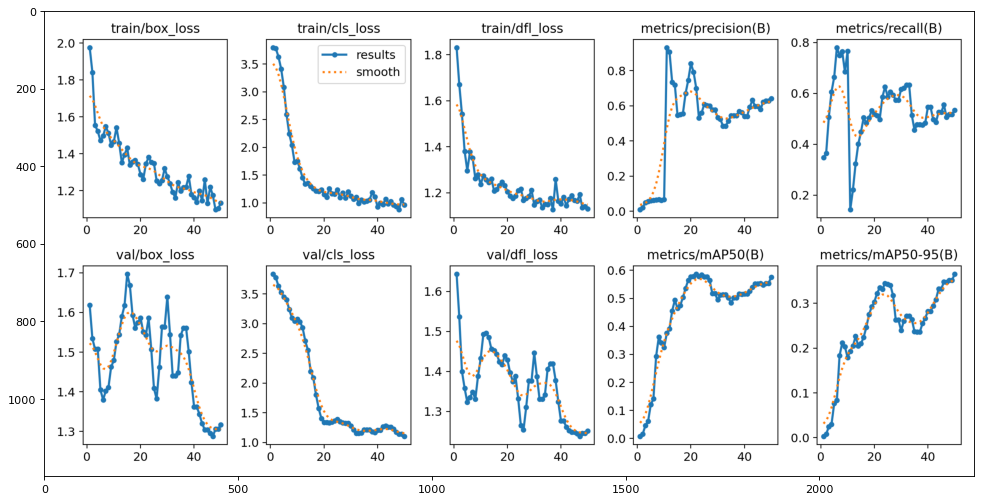

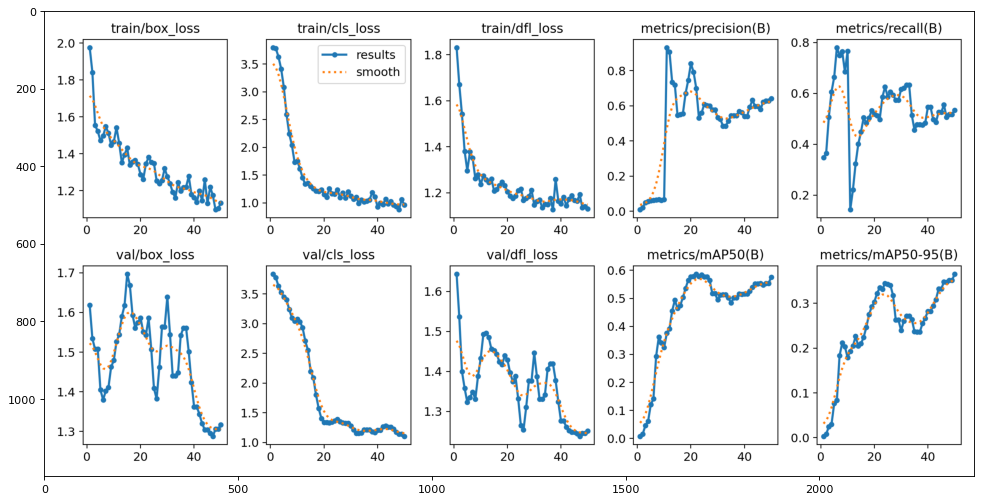

In [46]:
figure(figsize=(15, 10), dpi=80)
# reading the image 
results = img.imread('./runs/detect/train3/results.png')   
# displaying the image 
plt.imshow(results) 

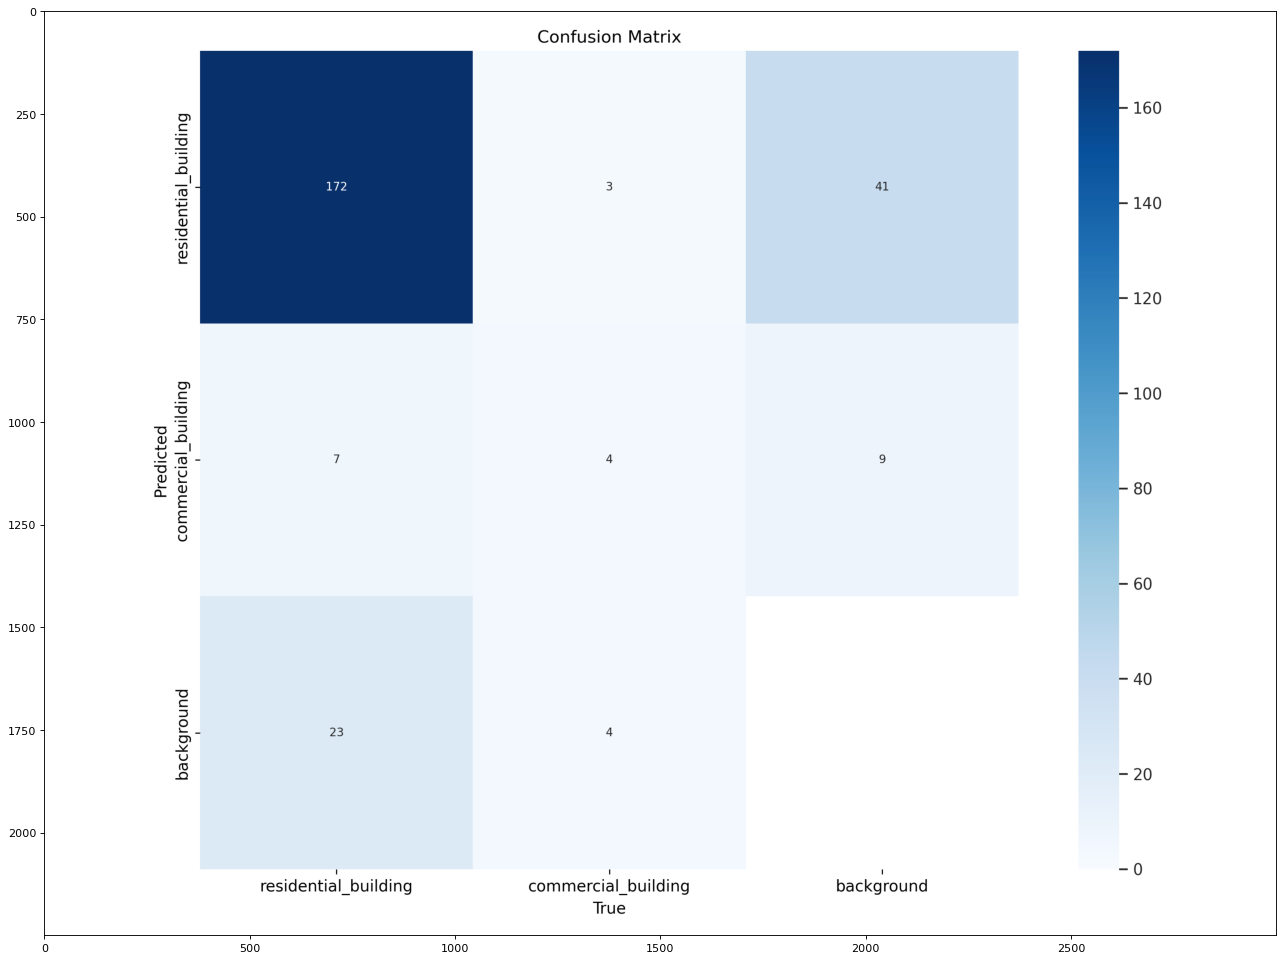

In [47]:
figure(figsize=(20,15), dpi=80)  
# reading the image 
cf = img.imread('./runs/detect/train3/confusion_matrix.png') 
# displaying the image 
plt.imshow(cf) 

In [48]:
def unzip_folder(zip_filepath, dest_dir):
    with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
        zip_ref.extractall(dest_dir)
    print(f'The zip file {zip_filepath} has been extracted to the directory {dest_dir}')



submission_zip = './challenge_1_submission_images.zip'
submission_directory = './challenge_1_submission_images'
unzip_folder(submission_zip,submission_directory)

The zip file ./challenge_1_submission_images.zip has been extracted to the directory ./challenge_1_submission_images


In [49]:
# Load the Model
model = YOLO('./runs/detect/train3/weights/best.pt')

In [50]:
# Decoding according to the .yaml file class names order
decoding_of_predictions ={0: 'residential_building', 1: 'commercial_building'}

directory = 'challenge_1_submission_images/'
# Directory to store outputs
results_directory = './Validation_Data_Results'

# Create submission directory if it doesn't exist
if not os.path.exists(results_directory):
    os.makedirs(results_directory)

# Loop through each file in the directory
for filename in os.listdir(directory):
    # Check if the current object is a file and ends with .jpeg
    if os.path.isfile(os.path.join(directory, filename)) and filename.lower().endswith('.jpg'):
        # Perform operations on the file
        file_path = os.path.join(directory, filename)
        print(file_path)
        print("Making a prediction on ", filename)
        results = model.predict(file_path, save=True, iou=0.5, save_txt=True, conf=0.25)
        
        for r in results:
            conf_list = r.boxes.conf.numpy().tolist()
            clss_list = r.boxes.cls.numpy().tolist()
            original_list = clss_list
            updated_list = []
            for element in original_list:
                 updated_list.append(decoding_of_predictions[int(element)])

        bounding_boxes = r.boxes.xyxy.numpy()
        confidences = conf_list
        class_names = updated_list

        # Check if bounding boxes, confidences and class names match
        if len(bounding_boxes) != len(confidences) or len(bounding_boxes) != len(class_names):
            print("Error: Number of bounding boxes, confidences, and class names should be the same.")
            continue
        text_file_name = os.path.splitext(filename)[0]
        # Creating a new .txt file for each image in the submission_directory
        with open(os.path.join(results_directory, f"{text_file_name}.txt"), "w") as file:
            for i in range(len(bounding_boxes)):
                # Get coordinates of each bounding box
                left, top, right, bottom = bounding_boxes[i]
                # Write content to file in desired format
                file.write(f"{class_names[i]} {confidences[i]} {left} {top} {right} {bottom}\n")
        print("Output files generated successfully.")


challenge_1_submission_images/Validation_Post_Event_008.jpg
Making a prediction on  Validation_Post_Event_008.jpg

image 1/1 /home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_1/challenge_1_submission_images/Validation_Post_Event_008.jpg: 512x512 5 residential_buildings, 3 commercial_buildings, 62.4ms
Speed: 1.4ms preprocess, 62.4ms inference, 0.9ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels
Output files generated successfully.
challenge_1_submission_images/Validation_Post_Event_002.jpg
Making a prediction on  Validation_Post_Event_002.jpg

image 1/1 /home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_1/challenge_1_submission_images/Validation_Post_Event_002.jpg: 512x512 1 residential_building, 6 commercial_buildings, 37.3ms
Speed: 1.0ms preprocess, 37.3ms inference, 0.8ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict
2 labe

In [51]:
!du -hcs *

80K	Validation_Data_Results
604K	challenge_1_submission_images
572K	challenge_1_submission_images.zip
584K	model_1.ipynb
20M	runs
48M	training_data_1
6.1M	training_data_1.tar
6.3M	yolov8n.pt
82M	total


In [52]:
!pwd

/home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_1


In [ ]:
!tar -cvf 